In [1]:
# need to do this for non-installed-package imports (e.g. the NISAR package)
import sys
sys.path.append('..')

In [2]:
from NISAR import GSLC

import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show, show_hist

In [3]:
%%time
# lazy-load of just the metadata
ds = GSLC('../reference/NISAR_L2_PR_GSLC_001_030_A_019_2800_SHNA_A_20081012T060911_20081012T060925_D00404_N_F_J_001.h5')

CPU times: user 99.5 ms, sys: 8.73 ms, total: 108 ms
Wall time: 153 ms


In [4]:
# listing of available polarisations in product
ds.available_polarisations

['HH']

In [5]:
# can access the projection of the geocoded data
ds.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

POLYGON Z ((-118.229299403331 34.3206258749987 1320.76281740076, -118.151534082954 34.3338786942818 1120.77187097282, -118.060028397752 34.3493955091373 1531.91638195187, -117.976604049868 34.363480146242 1720.85009707367, -117.894336528714 34.377308729912 1947.04321289366, -117.828082792363 34.3884100475657 1571.26008907924, -117.751376286448 34.4012063858746 1700.71484374996, -117.682481635952 34.4126591077 1550.66247528041, -117.617191706658 34.4234756780746 1290.07617187468, -117.550087310057 34.4345517270133 1161.1295173484, -117.482689576526 34.4456353398644 1096.66674743904, -117.506925922058 34.530435428607 931.641174041696, -117.528585579219 34.6156581392602 890.22561553607, -117.54671314656 34.7014580589525 1017.096679687, -117.570873525277 34.7862757772161 859.747863768964, -117.59207159806 34.871577676553 843.694519042567, -117.614159877774 34.9567361289629 786.888650710025, -117.635755241316 35.0419761919112 754.54467675034, -117.654709143162 35.1276462689462 847.498962401

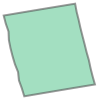

In [6]:
# can access the image geometry in geographic coordinates (shows as shape in notebooks)
print(ds.footprint)
ds.footprint

In [7]:
%%time
image_dict = ds.load_data('HH')
image_dict

CPU times: user 2.69 s, sys: 288 ms, total: 2.98 s
Wall time: 3.14 s


{'HH': array([[nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        ...,
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
        [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj]],
       shape=(24879, 9090), dtype=complex64)}

In [8]:
# convert complex to amplitude
hh = np.abs(image_dict['HH'])
# convert to decibels
hh_dB = 10 * np.log10(hh)
# need to mask out any inf values
hh_dB[~np.isfinite(hh_dB)] = np.nan

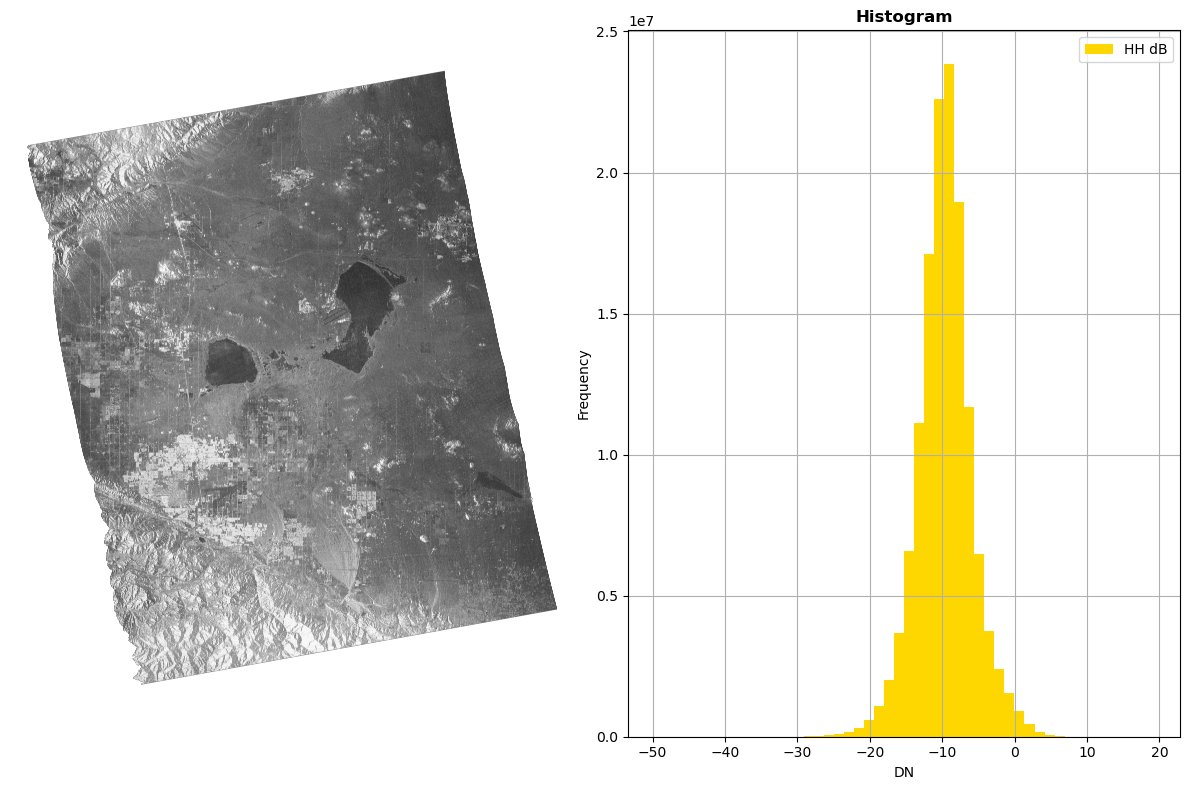

In [9]:
# apply a 5% clip for viewing
vmin, vmax = np.nanpercentile(hh_dB, (5, 95))

fig, (ax_img, ax_hist) = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
show(hh_dB, vmin=vmin, vmax=vmax, cmap='grey', ax=ax_img, aspect='auto')
show_hist(hh_dB, bins=50, title='Histogram', label='HH dB', ax=ax_hist);
ax_img.axis('off')
fig.tight_layout();